Mean Absolute Error: 49.00570000772189
R-squared: 0.7756369475195835


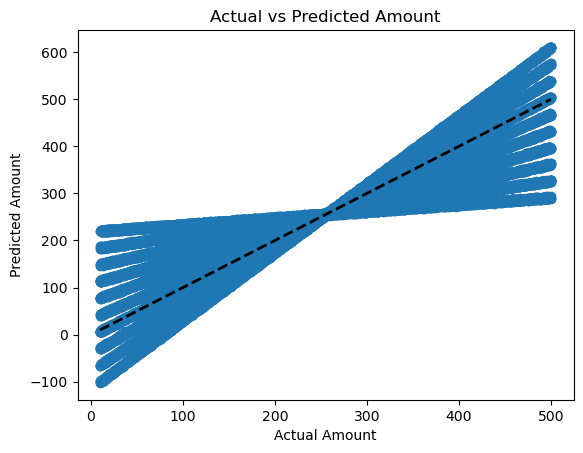

In [7]:
# Import necessary libraries
import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Set display options for pandas DataFrame
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Load data
df = pd.read_csv(r'C:/Users/kgogi/DSI/team_project-2/data/new_retail_data.csv')

# Select relevant columns
df = df[['Transaction_ID','Customer_ID','City', 'State','Country', 'Age', 'Gender', 'Income',
         'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount',
         'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
         'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']]

# Drop null rows
df_cleaned = df.dropna()

# Data type conversions
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m/%d/%Y')

# Create a new column to store yearmonth as integer
df_cleaned['yearmonth'] = df_cleaned['Date'].dt.strftime('%Y%m').astype(int)

# Month into date column
df_cleaned['Month_Number'] = pd.to_datetime(df_cleaned['Month'], format='%B').dt.month

# Convert time to time column
df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S').dt.time

# Feature engineering: Create Age Categories
bins = [0, 18, 30, 45, 60, np.inf]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df_cleaned['Age_Category'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels)

# One-hot encode categorical variables
categorical_features = ['Gender', 'Income', 'Customer_Segment', 'Product_Category', 
                        'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 
                        'Payment_Method', 'Order_Status', 'Age_Category']

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['Amount', 'Date', 'Transaction_ID', 'Customer_ID', 'City', 'State', 
                     'Country', 'Month', 'Time', 'products', 'yearmonth'], axis=1)
y = df_encoded['Amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model building using Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs Predicted Amount')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


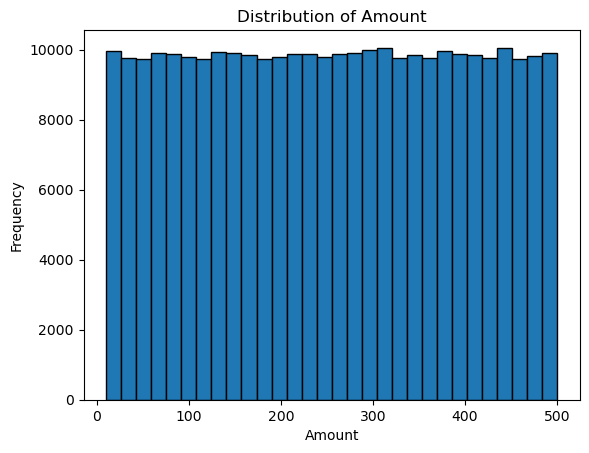

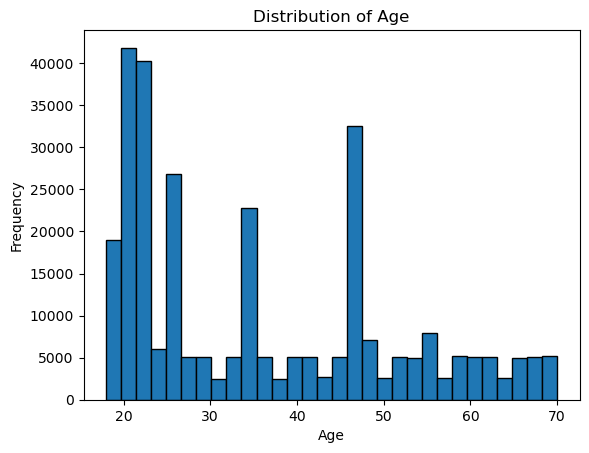

In [8]:
# Plot distribution of 'Amount'
plt.hist(df_cleaned['Amount'], bins=30, edgecolor='k')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of 'Age'
plt.hist(df_cleaned['Age'], bins=30, edgecolor='k')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


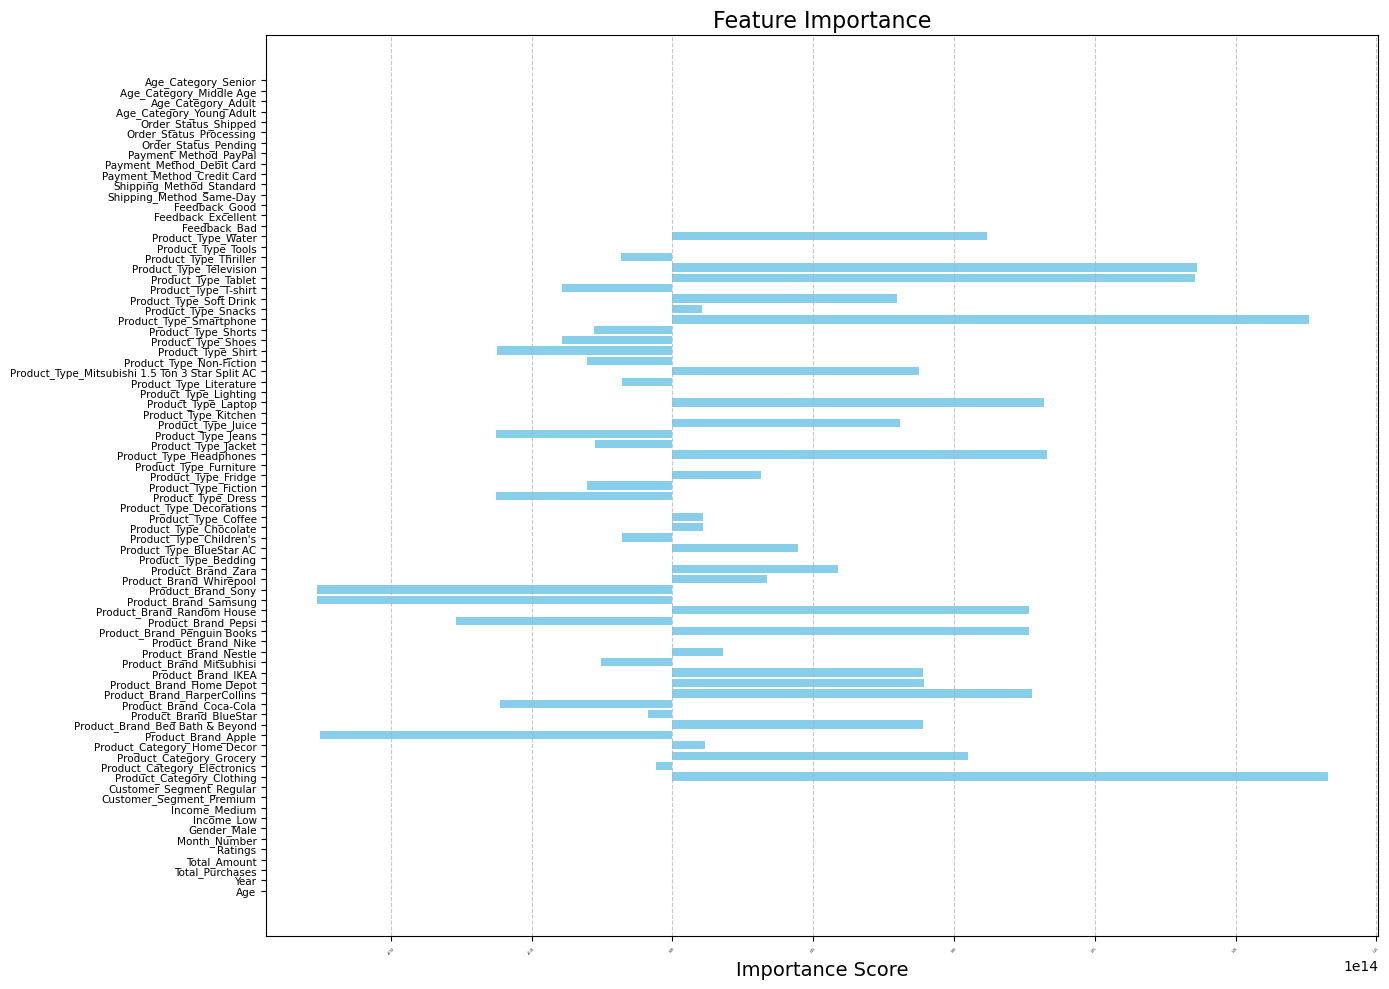

In [26]:
import matplotlib.pyplot as plt

# Assuming 'importance' and 'X.columns' are defined as in your code
plt.figure(figsize=(14, 10))  # Further increase figure size
plt.barh(X.columns, importance, color='skyblue')

plt.xlabel('Importance Score', fontsize=14)
plt.title('Feature Importance', fontsize=16)
plt.xticks(rotation=45, fontsize=2)  # Rotate x-axis labels and set font size
plt.yticks(fontsize=7.5)  # Set y-axis labels font size
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Use tight_layout to fit everything neatly
plt.tight_layout()

plt.show()


In [28]:
import time
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Start timing
start_time = time.time()

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# End timing
end_time = time.time()

# Print results
print(f'Random Forest MAE: {rf_mae}')
print(f'Random Forest R-squared: {rf_r2}')
print(f'Time taken: {end_time - start_time} seconds')


Random Forest MAE: 0.014335988669890089
Random Forest R-squared: 0.9999999813485606
Time taken: 376.0421211719513 seconds


In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit model
gb_model.fit(X_train_scaled, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f'Gradient Boosting MAE: {gb_mae}')
print(f'Gradient Boosting R-squared: {gb_r2}')


Gradient Boosting MAE: 7.678211022672579
Gradient Boosting R-squared: 0.9942467631895348
